In [13]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

# Read in the image
image = mpimg.imread('cutouts/cutout1.jpg')

# Take histograms in R, G, and B
rhist = np.histogram(image[:,:,0], bins=32, range=(0, 256))
ghist = np.histogram(image[:,:,1], bins=32, range=(0, 256))
bhist = np.histogram(image[:,:,2], bins=32, range=(0, 256))

In [4]:
bin_edges = rhist[1]
bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2


In [6]:
rhist[1]

array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
         72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
        144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
        216.,  224.,  232.,  240.,  248.,  256.])

In [9]:
bin_edges[0:len(bin_edges)-1]

array([   0.,    8.,   16.,   24.,   32.,   40.,   48.,   56.,   64.,
         72.,   80.,   88.,   96.,  104.,  112.,  120.,  128.,  136.,
        144.,  152.,  160.,  168.,  176.,  184.,  192.,  200.,  208.,
        216.,  224.,  232.,  240.,  248.])

In [10]:
bin_centers

array([   4.,   12.,   20.,   28.,   36.,   44.,   52.,   60.,   68.,
         76.,   84.,   92.,  100.,  108.,  116.,  124.,  132.,  140.,
        148.,  156.,  164.,  172.,  180.,  188.,  196.,  204.,  212.,
        220.,  228.,  236.,  244.,  252.])

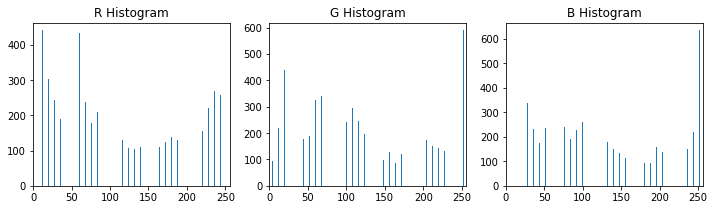

In [16]:
# Plot a figure with all three bar charts
fig = plt.figure(figsize=(12,3))
plt.subplot(131)
plt.bar(bin_centers, rhist[0])
plt.xlim(0, 256)
plt.title('R Histogram')
plt.subplot(132)
plt.bar(bin_centers, ghist[0])
plt.xlim(0, 256)
plt.title('G Histogram')
plt.subplot(133)
plt.bar(bin_centers, bhist[0])
plt.xlim(0, 256)
plt.title('B Histogram')
plt.show()

In [17]:
hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))


In [18]:
plt.bar(bin_centers, hist)

array([400, 441, 302, 244, 189, 283, 412, 433, 239, 177, 209, 302, 276,
       179, 129, 106, 104, 111, 106,  96, 111, 123, 139, 130, 167, 164,
       149, 156, 222, 268, 258,  53,  95, 219, 441, 331, 235, 179, 188,
       324, 340, 321, 252, 215, 242, 296, 244, 198, 133, 117,  98, 127,
        88, 120, 104,  88, 117, 172, 152, 142, 133, 159, 219, 589, 106,
       206, 367, 337, 230, 174, 235, 328, 316, 238, 189, 227, 261, 271,
       291, 244, 179, 148, 134, 112, 129, 123,  94,  93, 160, 138, 117,
       110, 121, 148, 219, 633])

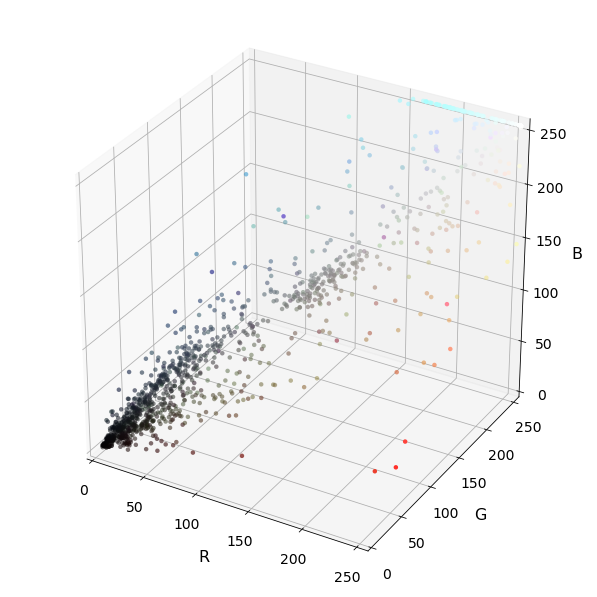

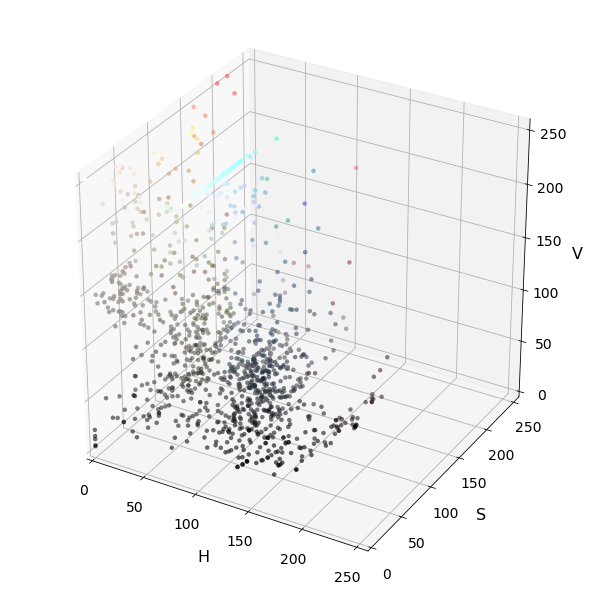

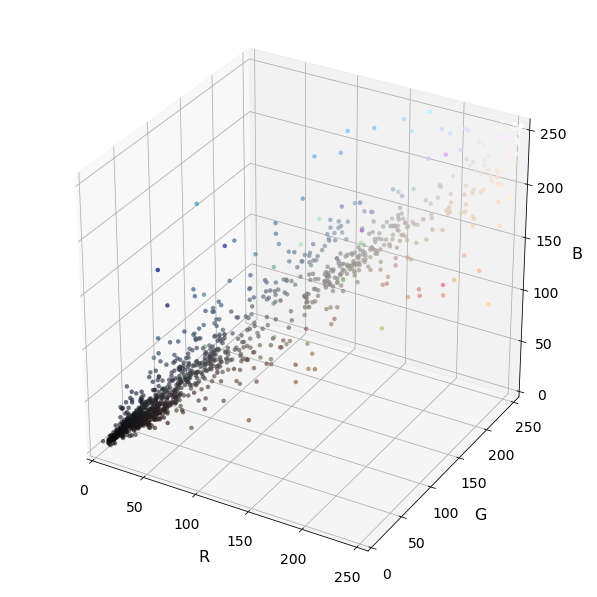

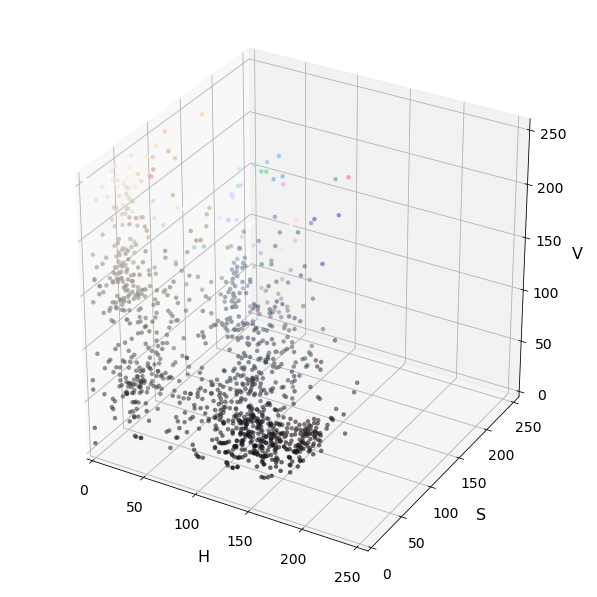

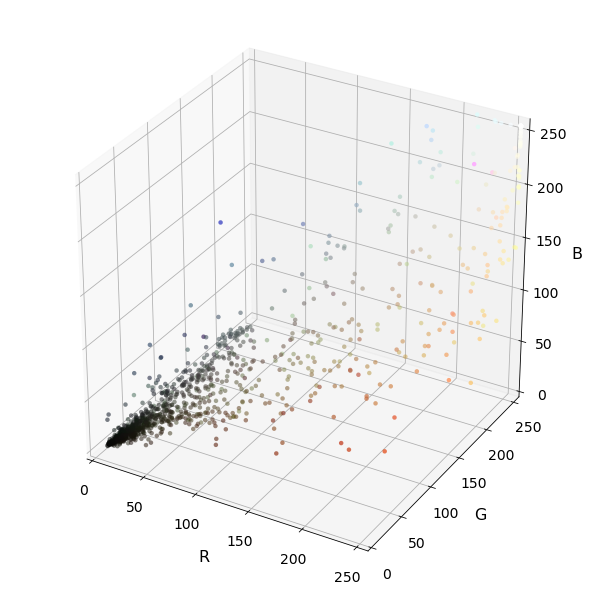

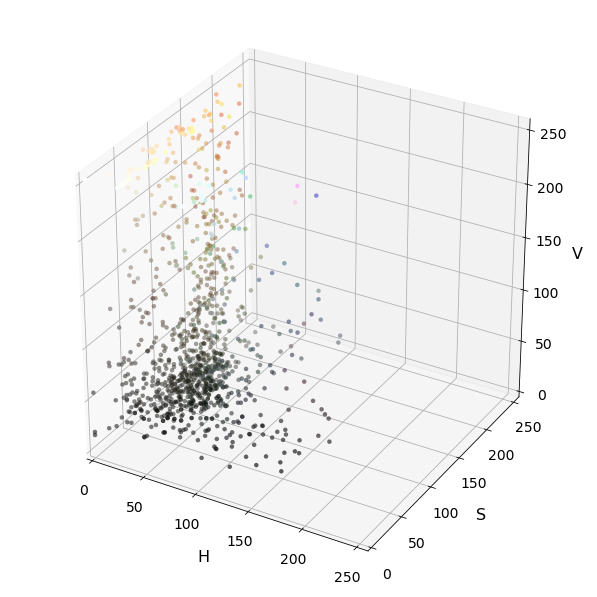

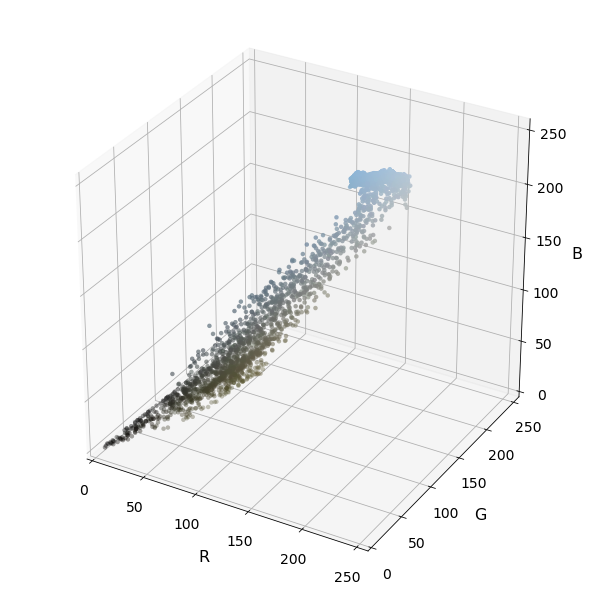

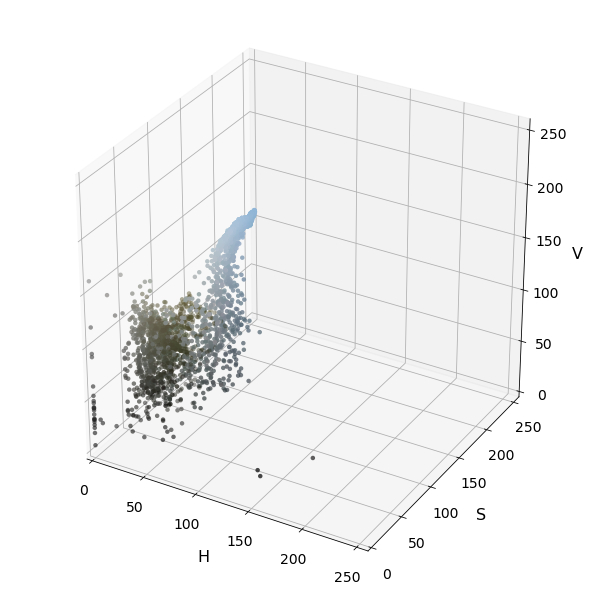

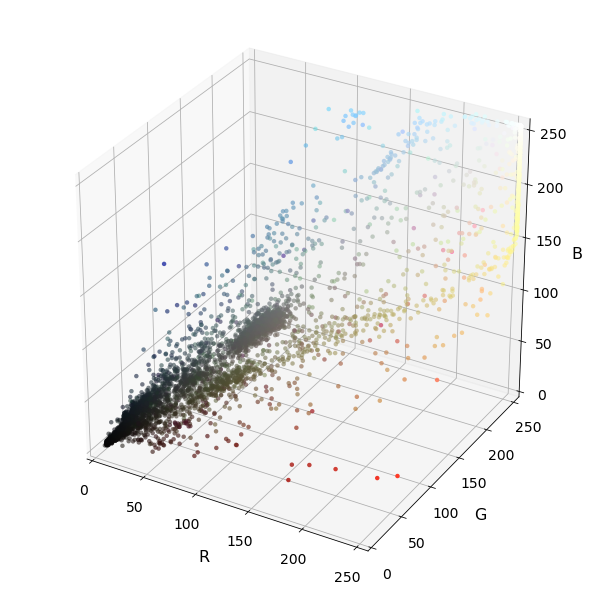

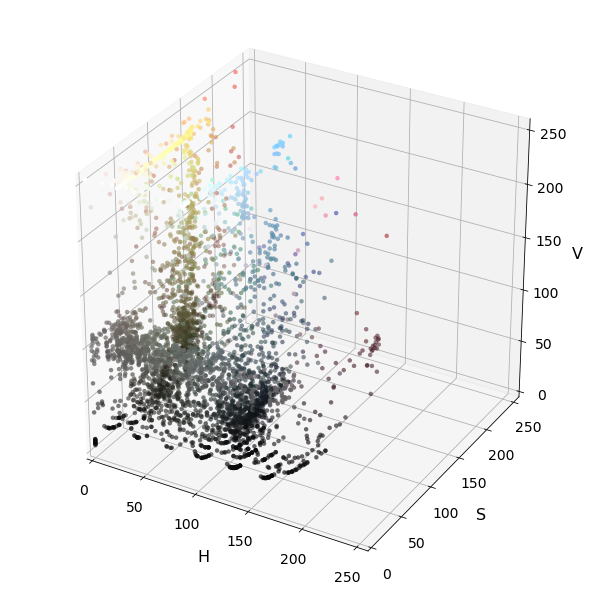

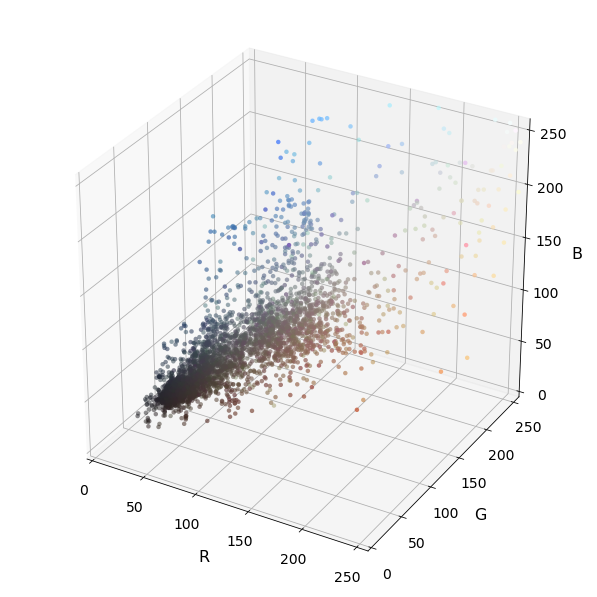

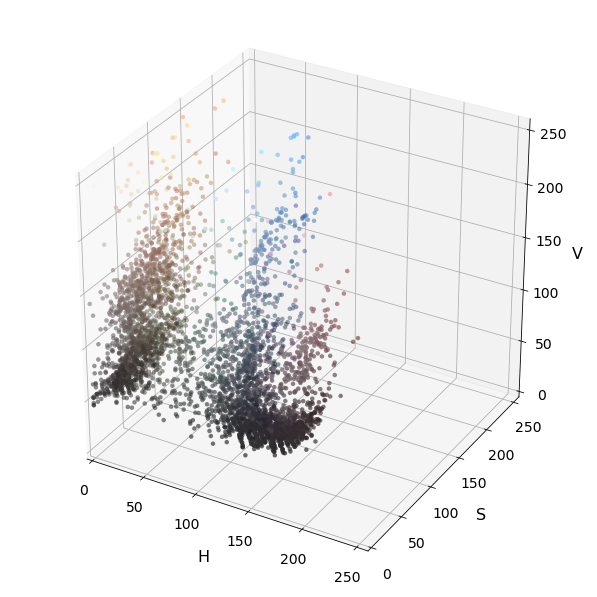

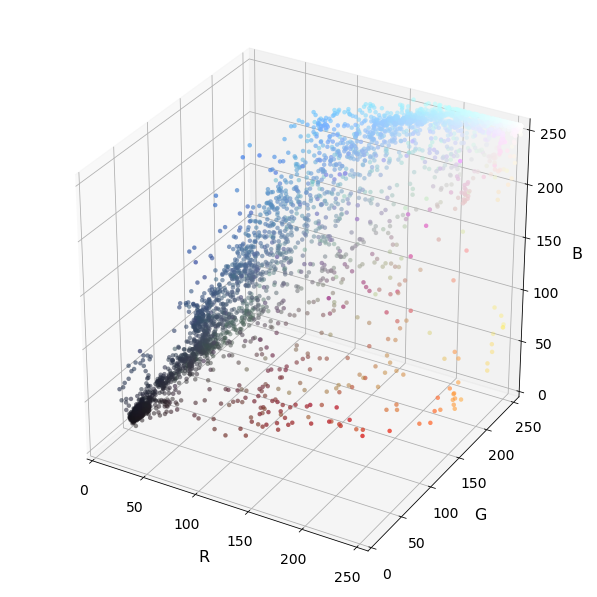

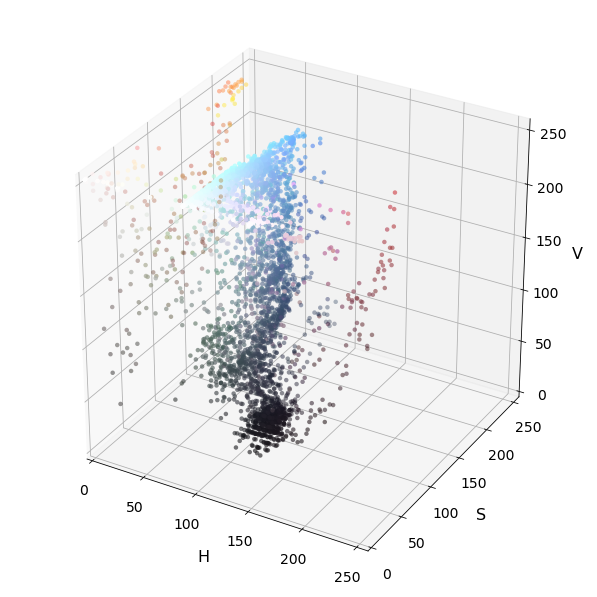

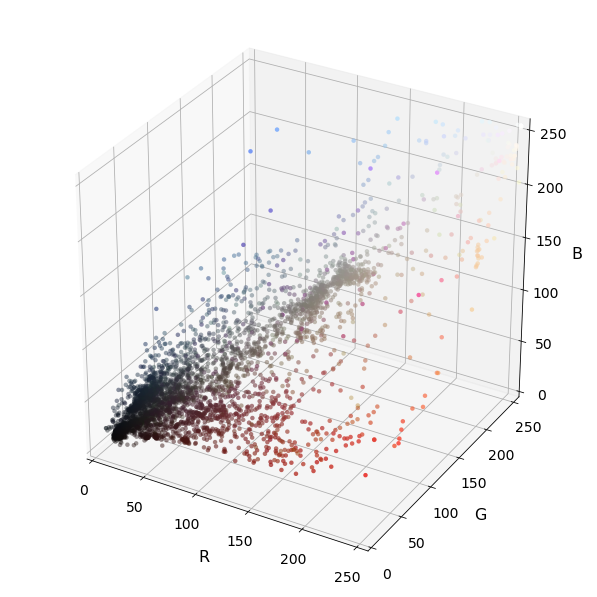

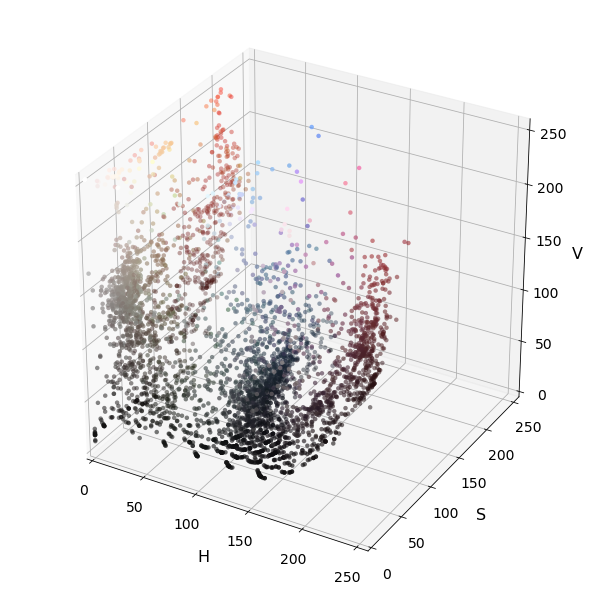

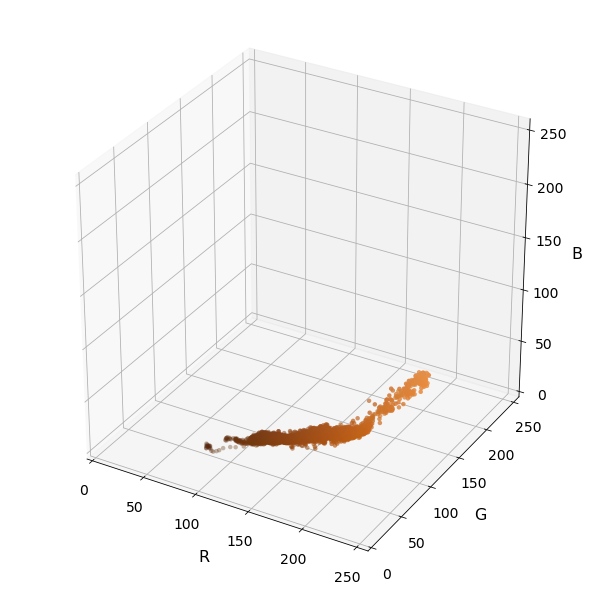

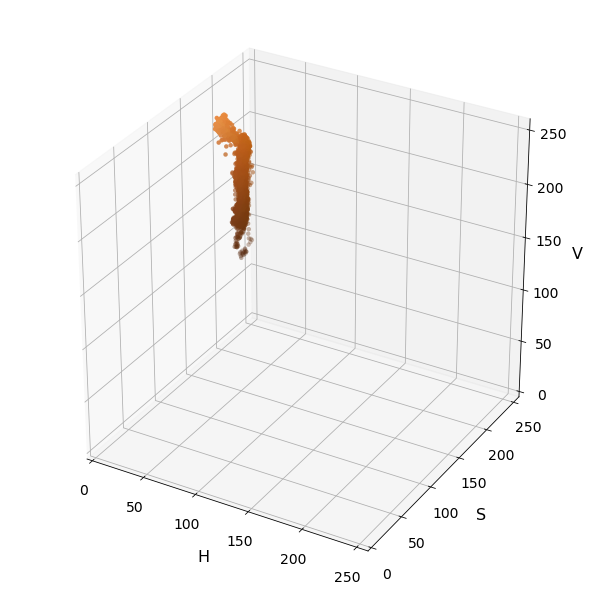

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.mplot3d import Axes3D


def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=[(0, 255), (0, 255), (0, 255)]):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

pngs = glob.glob('test_images/*.png')

for png in pngs:
    # Read a color image
    img = cv2.imread(png)

    # Select a small fraction of pixels to plot by subsampling it
    scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
    img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

    # Convert subsampled image to desired color space(s)
    img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
    img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
    img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

    # Plot and show
    plot3d(img_small_RGB, img_small_rgb)
    plt.show()

    plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
    plt.show()

In [22]:
from skimage.feature import hog
orient = 9
pix_per_cell = 8
cell_per_block = 2